In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Q1 tratados.csv')

In [4]:
df.head(4)

,Shopping,Métrica,Tipo,Semana,Previsto,Realizado
0,Shopping 1,Criação,Loja,1,30,7
1,Shopping 1,Criação,Loja,2,32,19
2,Shopping 1,Criação,Loja,3,32,26
3,Shopping 1,Criação,Loja,4,32,28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Shopping   325 non-null    object
 1   Métrica    325 non-null    object
 2   Tipo       325 non-null    object
 3   Semana     325 non-null    int64 
 4   Previsto   325 non-null    int64 
 5   Realizado  325 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.4+ KB


In [6]:
df.isnull().sum()

Shopping     0
Métrica      0
Tipo         0
Semana       0
Previsto     0
Realizado    0
dtype: int64

In [7]:
df.describe()

,Semana,Previsto,Realizado
count,325.000000,325.000000,325.000000
mean,3.000000,11.187692,11.713846
std,1.416394,7.360545,11.154691
min,1.000000,3.000000,0.000000
25%,2.000000,5.000000,5.000000
50%,3.000000,9.000000,9.000000
75%,4.000000,14.000000,15.000000
max,5.000000,32.000000,112.000000


In [ ]:
# Criando colunas auxiliares
df['Desvio'] = df['Realizado'] - df['Previsto']
df['% Desvio'] = (df['Desvio'] / df['Previsto']) * 100

# Desempenho geral da empresa

In [10]:
metricas = df.groupby('Métrica')[['Previsto', 'Realizado']].sum()

In [11]:
metricas['% Realizado'] = (metricas['Realizado'] / metricas['Previsto']) * 100

In [12]:
metricas.sort_values('% Realizado')

,Previsto,Realizado,% Realizado
Métrica,,,
Passagem online direta,999,882,88.288288
Ganho do online,340,305,89.705882
Ganho de loja,340,347,102.058824
Criação,1319,1516,114.935557
Passagem Loja,638,757,118.652038


# Comparação por Shopping

In [14]:
shoppings = df.groupby('Shopping ')[['Previsto', 'Realizado']].sum()
shoppings['% Realizado'] = (shoppings['Realizado'] / shoppings['Previsto']) * 100

In [15]:
shoppings.sort_values('% Realizado')

,Previsto,Realizado,% Realizado
Shopping,,,
Shopping 1,354,268,75.706215
Shopping 6,314,263,83.757962
Shopping 2,354,337,95.197740
Shopping 7,266,256,96.240602
Shopping 9,220,212,96.363636
Shopping 12,212,210,99.056604
Shopping 13,212,211,99.528302
Shopping 3,354,358,101.129944
Shopping 10,212,222,104.716981


# Loja vs Online

In [16]:
tipo = df.groupby('Tipo')[['Previsto', 'Realizado']].sum()
tipo['% Realizado'] = (tipo['Realizado'] / tipo['Previsto']) * 100

In [17]:
tipo

,Previsto,Realizado,% Realizado
Tipo,,,
Loja,2297,2620,114.061820
Online,1339,1187,88.648245


# Tendência semanal

In [19]:
semanal = df.groupby(['Semana ', 'Tipo'])[['Previsto', 'Realizado']].sum().reset_index()

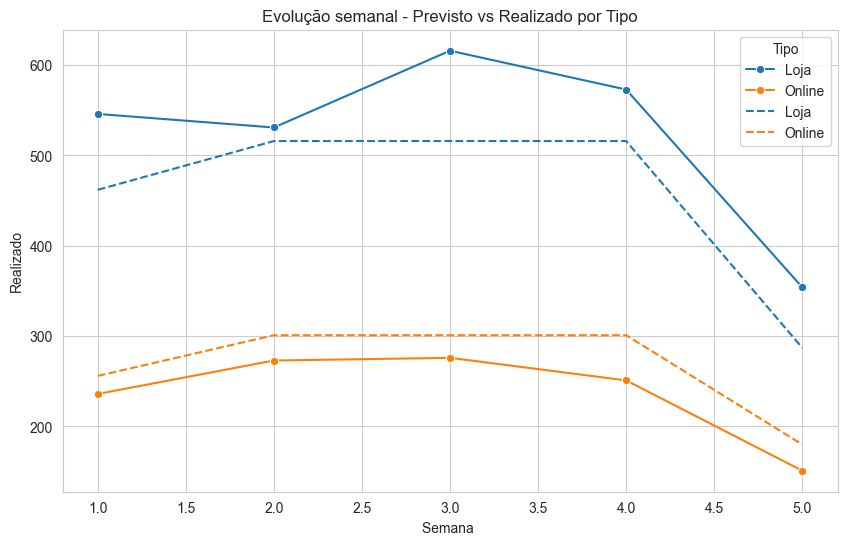

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=semanal, x='Semana ', y='Realizado', hue='Tipo', marker='o')
sns.lineplot(data=semanal, x='Semana ', y='Previsto', hue='Tipo', linestyle='--')
plt.title('Evolução semanal - Previsto vs Realizado por Tipo')
plt.grid(True)
plt.show()

In [24]:
top_neg = df.sort_values('% Desvio').head(10)
top_pos = df.sort_values('% Desvio', ascending=False).head(10)

print("Maiores desvios negativos:")
print(top_neg[['Shopping ', 'Métrica', 'Tipo', 'Semana ', '% Desvio']])

print("\nMaiores desvios positivos:")
print(top_pos[['Shopping ', 'Métrica', 'Tipo', 'Semana ', '% Desvio']])


Maiores desvios negativos:
     Shopping                  Métrica    Tipo  Semana     % Desvio
88  Shopping 4  Passagem online direta  Online        4 -100.000000
89  Shopping 4  Passagem online direta  Online        5 -100.000000
95  Shopping 4         Ganho do online  Online        1 -100.000000
97  Shopping 4         Ganho do online  Online        3 -100.000000
98  Shopping 4         Ganho do online  Online        4 -100.000000
22  Shopping 1         Ganho do online  Online        3 -100.000000
87  Shopping 4  Passagem online direta  Online        3  -95.238095
85  Shopping 4  Passagem online direta  Online        1  -94.444444
46  Shopping 2         Ganho do online  Online        2  -85.714286
41  Shopping 2           Ganho de loja    Loja        2  -85.714286

Maiores desvios positivos:
       Shopping         Métrica  Tipo  Semana     % Desvio
84    Shopping 4  Passagem Loja  Loja        5  400.000000
82    Shopping 4  Passagem Loja  Loja        3  346.153846
75    Shopping 4    

In [28]:
df.to_csv('Q1 tratados PY.csv', index = False)